In [ ]:
import utils
from dataset import BuildingDataset
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from model import get_transform
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
import torch

In [ ]:
# Load data for exploration.
dataset_test = BuildingDataset(
    "datasets/mlc_training_data/images_annotated/",
)

dataset_test[0]

In [ ]:
# Load data for exploration.
dataset_expl = BuildingDataset(
    "datasets/mlc_training_data/images_annotated/",
)

data = [d for d in dataset_expl]

In [ ]:
def show_segmentation(img, masks, boxes=None, labels=None, bcolors="red"):
    output_image = draw_segmentation_masks(img, masks.to(torch.bool), alpha=0.8)
    if boxes is not None:
        output_image = draw_bounding_boxes(output_image, boxes, labels, colors=bcolors)

    plt.figure(figsize=(12, 12))
    plt.imshow(output_image.permute(1, 2, 0))


for sample in data[:10]:
    img, masks, boxes = sample[0], sample[1]["masks"], sample[1]["boxes"]
    height_labels = [str(h.item()) for h in sample[1]["building_heights"]]
    show_segmentation(img, masks, boxes, height_labels)

Min:  1 Max:  488
Quantile 0.25: 11.0
Quantile 0.5: 20.0
Quantile 0.75: 31.0
Quantile 0.95: 87.29999999999973
Quantile 0.99: 219.0


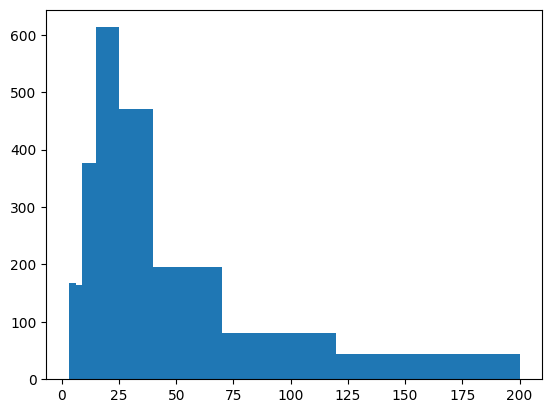

In [29]:
def show_distribution(values, bins=None):
    counts, bins = np.histogram(
        values,
        bins=bins,
    )
    plt.stairs(counts, bins, fill=True)

    print("Min: ", masks.min(), "Max: ", masks.max())

    for q in [0.25, 0.5, 0.75, 0.95, 0.99]:
        print(f"Quantile {q}: {np.quantile(values, q)}")


# heights = [d[1]["building_heights"] for d in data]
# heights = np.stack(heights, axis=0)
# show_distribution(heights, [3, 6, 9, 15, 25, 40, 70, 120, 200, max(250, heights.max())])

masks = [len(d[1]["masks"]) for d in data]
masks = np.stack(masks, axis=0)
show_distribution(masks, [3, 6, 9, 15, 25, 40, 70, 120, 200])

[len(d[1]["masks"]) for d in data]


In [ ]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

dataset = BuildingDataset(
    "datasets/mlc_training_data/images_annotated/",
    transforms=get_transform(train=True),
)

data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
    num_workers=4,
    collate_fn=utils.collate_fn,
)

# For Training
images, targets = next(iter(data_loader))

images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images, targets)  # Returns losses and detections
print(output)

# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)
print(predictions[0])

In [10]:
from model import train

train(
    dataset_root="datasets/mlc_training_data/images_annotated",
    num_epochs=20,
    train_batch_size=10,
)

Loss is nan, stopping training
{'loss_classifier': tensor(nan, grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(nan, grad_fn=<DivBackward0>), 'loss_building_height_reg': tensor(nan, grad_fn=<SmoothL1LossBackward0>), 'loss_mask': tensor(nan, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_objectness': tensor(nan, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(nan, grad_fn=<DivBackward0>)}


SystemExit: 1

/Users/volodymyr/work/personal/building_height_detection/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
